## Decision Tree Regression

Import Important libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the data

In [19]:
df= pd.read_csv('car.csv')
df.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


In [33]:
df.shape

(8128, 12)

Split data to Features(x) and label(y)

In [21]:
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 

Chack for missing values

In [22]:
pd.DataFrame(x).isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7     221
8     221
9     216
10    221
dtype: int64

Impute Missing values

In [23]:
from sklearn.impute import SimpleImputer

missing_cols = range(7, 11) 
most_freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
most_freq_imputer.fit(x[:, missing_cols])
x[:, missing_cols] = most_freq_imputer.transform(x[:, missing_cols])

In [24]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Encoding the Categorical data

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

category_cols = [0, 3, 4, 5, 6]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), category_cols)], remainder='passthrough')
x = np.array(ct.fit_transform(x))
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2014,145500,23.4,1248.0,74.0,5.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2014,120000,21.14,1498.0,103.52,5.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2006,140000,17.7,1497.0,78.0,5.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2010,127000,23.0,1396.0,90.0,5.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2007,120000,16.1,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2013,110000,18.5,1197.0,82.85,5.0
8124,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2007,119000,16.8,1493.0,110.0,5.0
8125,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2009,120000,19.3,1248.0,73.9,5.0
8126,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013,25000,23.57,1396.0,70.0,5.0


Splitting the dataset into training set and test set

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

Training the Decision Tree Regression model on the training set

In [27]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor( random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

Predicting the test set 

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[345000. 345000.]
 [495000. 900000.]
 [475000. 475000.]
 ...
 [550000. 700000.]
 [484999. 650000.]
 [750000. 750000.]]


In [30]:
training_acc = np.ceil(classifier.score(x_test, y_test) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  94.0 %


In [31]:
testing_acc = np.ceil(classifier.score(x_test, y_test) * 100)
print("The Testing Accuracy = ", testing_acc, "%")

The Testing Accuracy =  94.0 %


Visualising the Training set results

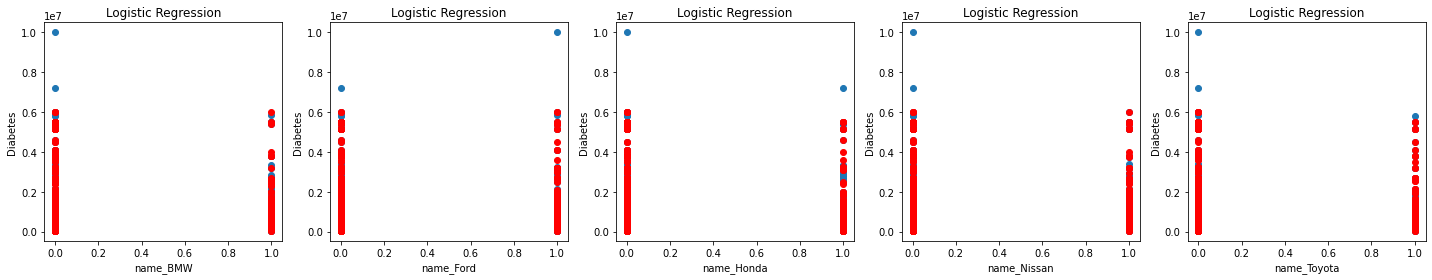

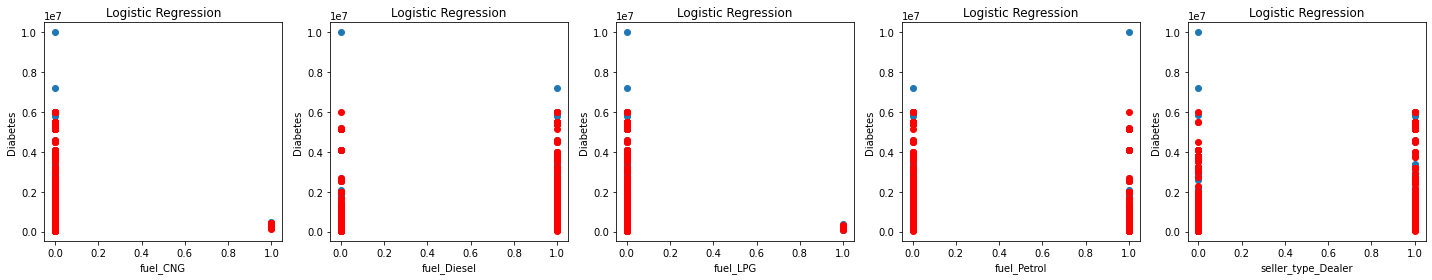

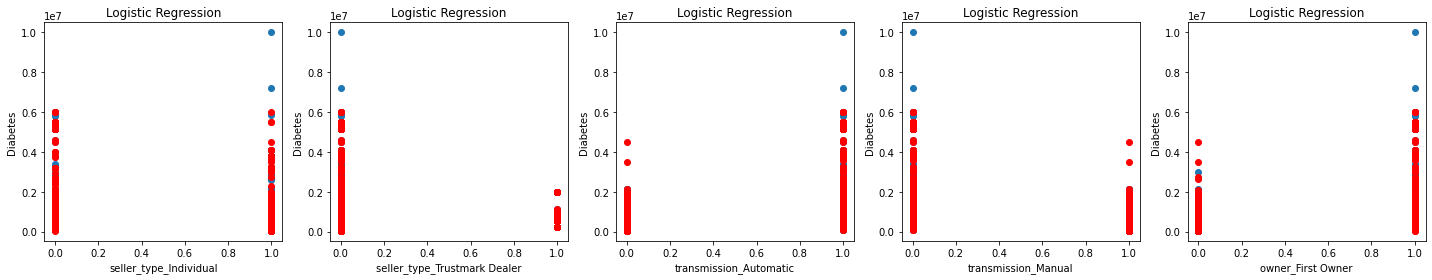

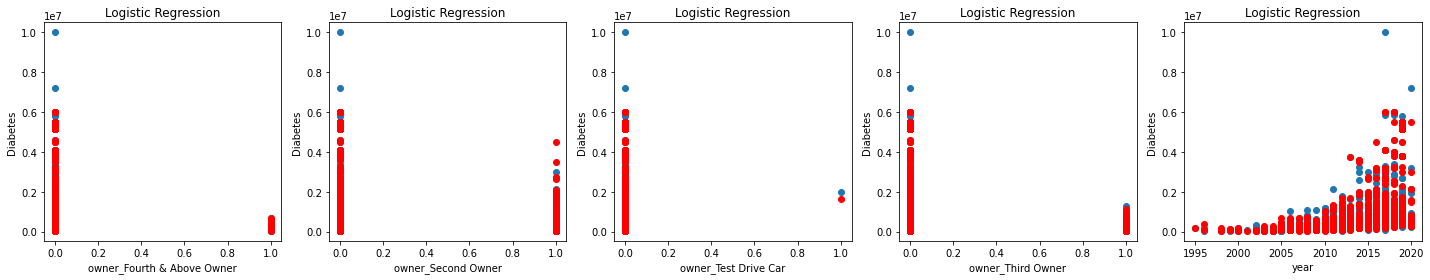

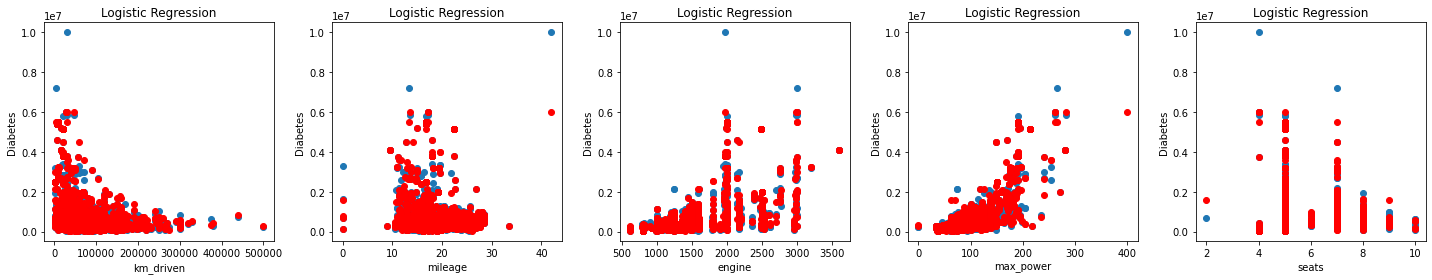

In [32]:
# virtualize y_pred with y_test
num_features = x_test.shape[1]
plots_per_row = 5
y_pred = classifier.predict(x_test)

name = np.array(list((pd.get_dummies(data=df)).columns))
k=7
for i in range(int(np.ceil(num_features / plots_per_row))):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4)) 
    for j in range(plots_per_row):
        index = i * plots_per_row + j
        if index >= num_features:
            break
        
        axes[j].scatter(x_test[:, index], y_test)
        axes[j].scatter(x_test[:, index], y_pred, c='r')

        axes[j].set_title('Logistic Regression')
        axes[j].set_xlabel(name[k])
        axes[j].set_ylabel('Diabetes')
        if (k==25):
            k=0
        else:
            k=k+1
        
    plt.tight_layout()
    plt.show()
